In [2]:
%matplotlib inline

# Plotting setup
import matplotlib.pyplot as plt
import geopandas

# Package imports
import numpy as np
import pandas as pd

# Allow import of own scripts #
import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
###############################

# Own functions
from src.load_taxi_data import load_taxi_data
from src.taxi_zones_loader import taxi_zones_loader
from src.preprocess_data import preprocess_data
from src.keep_correct_year import keep_correct_year

**Data acquisition:**

In [3]:
# Read previously saved dataframe from csv file from disk
df_taxi_2019_01_raw = pd.read_csv('../dat/df_taxi_2019_01.csv')

**Preprocessing:**

In [4]:
# Preprocessing
df_taxi_2019_01 = preprocess_data(df_taxi_2019_01_raw)

About 5.81% of the entire data could not be used due to missing information (NaN).


In [5]:
df_taxi_2019_01.head()

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,fleet
0,2019-01-01 00:46:40,2019-01-01 00:53:20,151,239,yellow
1,2019-01-01 00:59:47,2019-01-01 01:18:59,239,246,yellow
2,2018-12-21 13:48:30,2018-12-21 13:52:40,236,236,yellow
3,2018-11-28 15:52:25,2018-11-28 15:55:45,193,193,yellow
4,2018-11-28 15:56:57,2018-11-28 15:58:33,193,193,yellow


_Caution: The data is provided in a bad condition: There is data from 2018 in the 2019 data set!_

In [6]:
# Remove wrong years from data set
df_taxi_2019_01 = keep_correct_year(df_taxi_2019_01, 2019)

About 0.00% of the entire data could not be used because they contained the wrong year.


In [7]:
df_taxi_2019_01

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,fleet
0,2019-01-01 00:46:40,2019-01-01 00:53:20,151,239,yellow
1,2019-01-01 00:59:47,2019-01-01 01:18:59,239,246,yellow
7,2019-01-01 00:21:28,2019-01-01 00:28:37,163,229,yellow
8,2019-01-01 00:32:01,2019-01-01 00:45:39,229,7,yellow
9,2019-01-01 00:57:32,2019-01-01 01:09:32,141,234,yellow
...,...,...,...,...,...
31429479,2019-01-31 23:32:45,2019-01-31 23:32:49,247,45,fhv
31429481,2019-01-31 23:37:00,2019-01-31 23:54:00,265,265,fhv
31429482,2019-01-31 23:58:00,2019-02-01 00:59:00,265,265,fhv
31429483,2019-01-31 23:46:00,2019-02-01 00:21:00,265,265,fhv


**Count trips:**

...for drop-offs

In [9]:
'''
 * Count how often each possible destination (DOLocationID) was approached for all possible origins (PULocationID).
 * Series.reset_index can be used with name= set to create a DataFrame instead of a Series and give a name to the
   otherwise unnamed values column that will hold the result of value_counts().
'''
df_trip_counts = df_taxi_2019_01.groupby("PULocationID")["DOLocationID"].value_counts().reset_index(name='trip_count')
#s_trip_counts = df_taxi_2019_01.groupby("PULocationID")["DOLocationID"].value_counts()

In [10]:
df_trip_counts

,PULocationID,DOLocationID,trip_count
0,1,265,503
1,1,1,457
2,1,231,87
3,1,239,82
4,1,166,78
...,...,...,...
59489,265,195,1
59490,265,202,1
59491,265,207,1
59492,265,227,1


In [11]:
# Count number of drop-offs for each taxi zone
df_taxi_2019_01.groupby('DOLocationID')['DOLocationID'].count()

DOLocationID
1      113671
2          64
3       34295
4      116619
5        4241
        ...  
261    105687
262    212476
263    311050
264    924897
265    696003
Name: DOLocationID, Length: 264, dtype: int64

<hr>

**Load geo data for visualization:**

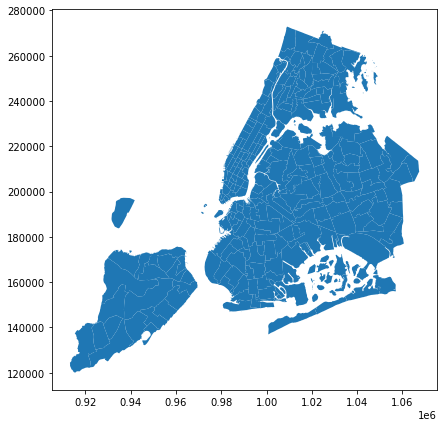

In [18]:
gdf_zones = geopandas.read_file('../dat/taxi_zones/taxi_zones.shp')
gdf_zones.plot(figsize=(7,7))
plt.show()

In [19]:
gdf_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [37]:
# Add geo data for later visualization
#df_do_counts = df_trip_counts.merge(left_on='DOLocationID', right=gdf_zones, right_on='LocationID')

gdf_zones = gdf_zones.merge(left_on='LocationID', right=df_trip_counts, right_on='DOLocationID')

In [41]:
gdf_zones.rename(columns={"trip_count": "DO_count"}, inplace=True)

In [42]:
gdf_zones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,DOLocationID,DO_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,1,457
1,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",3,1,13
2,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",4,1,406
3,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",5,1,85
4,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",6,1,97
...,...,...,...,...,...,...,...,...,...,...
59073,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",261,263,590
59074,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",262,263,10838
59075,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",263,263,14146
59076,263,0.037017,0.000066,Yorkville West,263,Manhattan,"POLYGON ((997493.323 220912.386, 997355.264 22...",264,263,333


In [29]:
# Set geometry such that geopandas knows which column to use for plotting polygons, ...
df_do_counts.set_geometry("geometry");

<AxesSubplot:>

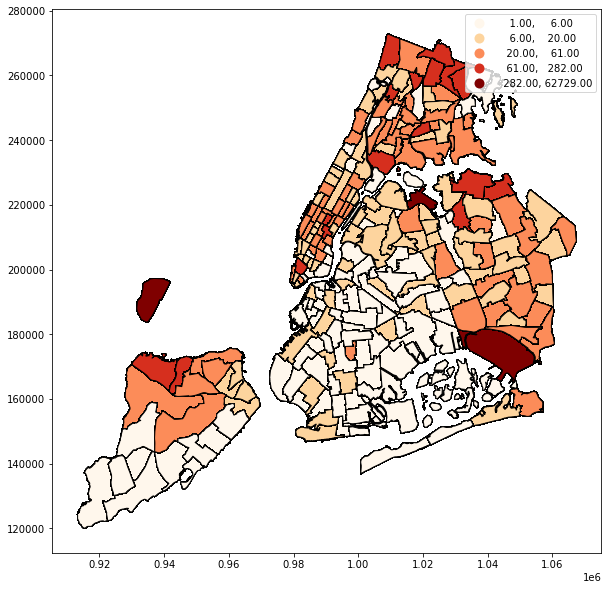

In [44]:
gdf_zones.plot(figsize=(10, 10), column='DO_count', scheme='quantiles', cmap='OrRd', edgecolor='k', legend=True)

In [40]:
type(gdf_zones)

geopandas.geodataframe.GeoDataFrame

In [46]:
import plotly.express as px

In [ ]:
fig = px.choropleth(gdf_zones, geojson=gdf_zones.geometry, 
                    locations=gdf_zones.index, color="DO_count",
                    color_continuous_scale="YIOrRd")

In [48]:
fig = px.choropleth(gdf_zones, geojson=gdf_zones.geometry, 
                    locations=gdf_zones.index, color="DO_count",
                    height=500,
                    color_continuous_scale="YIOrRd")